# Сборный проект №1

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Описание данных**  

•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)  
•	EU_sales — продажи в Европе (миллионы проданных копий)  
•	JP_sales — продажи в Японии (миллионы проданных копий)  
•	Other_sales — продажи в других странах (миллионы проданных копий)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB   

## Загрузка данных и изучение общей информации

**Путь к файлу: /datasets/games.csv**  

In [1]:
#подключение библиотек, используемых в проекте
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
import math as mt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#чтобы не исправлять путь к файлу при смене локальной среды и среды яндекс.практикум - применим следующую конструкцию
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('datasets\games.csv')

In [3]:
df.info()
display(df.head())
print('Дубликатов в исходных данных: ',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Дубликатов в исходных данных:  0


### Выводы

- Данные из файла games.csv загружены в dataframe с именем df.  
- Набор данных состоит из 11 колонок и 16715 записей.  
- Наименования колонок приведем к нижнему регистру.
- В колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating есть пропущенные значения, которые будут обработаны далее.  
- Тип колонки Year_of_release после заполнения пропусков можно привести к типу int, т.к. год у нас может быть только целым.
- Тип колонки User_score преобразуем к float.  
- Дубликаты в исходных данных отсутствуют.

## Подготовка данных

Проведем подготовку данных в соответствии с выводами предыдущего пункта:

Приведем наименование столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Займемся исследованием пропусков. Для начала посмотрим колонки name и genre.  
В данных колонках всего два пропуска, есть подозрения что эти пропуски в одних и тех же строках. Проверим предположение.

In [5]:
df[(df['name'].isna()) | (df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Предположения подтвердились, две игры 1993 года без имени и жанра нам неинтересны с точки зрения дальнейшего анализа. Поскольку строк всего 2 - можно их удалить.

In [6]:
df = df[~df['name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Пропуски в колонках critic_score и user_score заполнять не будем, т.к. данные колонки используются далее в анализе данных и проверке гипотез и некорректное заполнение пропусков может повлиять на результаты анализа данных. Кроме того, по опыту - рейтинг игры - непредсказуемая цифра, которую предсказывать очень сложно.
Поэтому приведем колонку user_score к типу float и перейдем к следующим колонкам.

In [7]:
try:
    df['user_score'] = df['user_score'].astype('float64')
except:
    print('Ошибка преобразования типов')

Ошибка преобразования типов


При попытке преобразования типа вызвается исключение, посмотрим подробнее на данные в столбце user_score

In [8]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.4      72
5.6      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.3      37
4.6      37
4.5      34
4.4      33
4.1      33
9.3      31
4.2      28
3.8      28
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.6      20
3.7      19
3.3      15
3.2      13
3.9      13
2.5      12
2        11
2.4      11
9.4      11
2.1       9
2.9       9
1.7       9
2.7       8
9.5       6
2.2       6
1.8       6
1.4       5
2.6       4
1.2       3
1.6       3
1.5       2
2.3       2
1   

В столбце встречается оценка 'tbd'. Посоветовавшись с google, выяснилось, что это означает "To Be Determined". Для нас это означает отсутствие оценки, поэтому заменим значение tbd на Nan.

In [9]:
df.loc[df['user_score']=='tbd','user_score'] = np.nan

In [10]:
try:
    df['user_score'] = df['user_score'].astype('float64')
except:
    print('Ошибка преобразования типов')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Рассмотрим столбец year_of_release. Для удобства вывода информации о пропусках - определим вспомогательную функцию.


In [12]:
def isna_info_col(data, col):
    print('Пропущено значений в столбце ',col,'-', data[col].isna().sum())
    print('Процент пропусков от общего количества строк: {:.2%}'.format(data[col].isna().sum()/data[col].shape[0]))

isna_info_col(df,'year_of_release') 

Пропущено значений в столбце  year_of_release - 269
Процент пропусков от общего количества строк: 1.61%


Пропусков немного (1,6%), и можно было бы заменить их значением заглушкой (например '-1').
Но зная индустрию игр, можно предположить, что игра выходит в один год сразу на нескольких платформах, поэтому можно заполнить год релиза на другой платформе с учетом группировки по имени игры. Такая ситуация не касается эксклюзивных игр (Sony), но данные игры до 2022 года впринципе выходили только на платформе PlayStation, поэтому никаких проблем в заполнении быть не должно.

In [13]:
data_transformed = df.groupby('name')['year_of_release'].transform('first')
df['year_of_release'] = df['year_of_release'].fillna(data_transformed)
isna_info_col(df,'year_of_release')

Пропущено значений в столбце  year_of_release - 146
Процент пропусков от общего количества строк: 0.87%


Удалось заполнить 123 пропуска.
Оставшиеся значения заполним значением заглушкой '-1', чтобы они не повлияли на выводы по результатам анализа

In [14]:
df['year_of_release'] = df['year_of_release'].fillna(-1)

try:
    df['year_of_release'] = df['year_of_release'].astype('int64')
except:
    print('Ошибка преобразования типов')

Рассмотрим столбец 'rating'

In [15]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Пропущено около 40% значений. Возрастной рейтинг для одной и той же игры на разных платформах должен быть одинаковым, поэтому заполним его по аналогии со столбцом год релиза

In [16]:
isna_info_col(df,'rating') 

Пропущено значений в столбце  rating - 6764
Процент пропусков от общего количества строк: 40.47%


In [17]:
data_transformed = df.groupby('name')['rating'].transform('first')
df['rating'] = df['rating'].fillna(data_transformed)
isna_info_col(df,'rating')

Пропущено значений в столбце  rating - 6327
Процент пропусков от общего количества строк: 37.86%


Удалось заполнить 437 строк. оставшиеся пропуски заполним значением 'unknown'

In [18]:
df['rating'] = df['rating'].fillna('unknown')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Пропуски обработаны.  
Создадим отдельный столбец с суммарными продажами по всем регионам.

In [20]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Выводы

1) На этапе предобработки приведены к нижнему регистру названия столбцов, заполнены (по возможности) пропущенные значения и изменен (при необходимости) тип данных столбцов.  
2) Пропуски в данных могут быть вызваны тем, что они были не заполнены в исходной БД, либо произошел сбой при выгрузе данных из базы.  
3) Подсчитаны суммарные продажи во всех регисонах и записаны в отдельный столбец.  
4) Данные подготовлены для дальнейшего анализа.

## Анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? Для этого построим гистограмму по году релиза. Также выведем дополнительные показатели по колонке.
Воспользуемся вспомогательной функцией. которую применяли в одном из прошлых проектов.

In [21]:
def column_description(df, col, bins_count=30, range_min=0, range_max=0):
    display(df[col].describe())
    #рассчитаем квантили
    display(df[col].quantile([0.01,0.05,0.95,0.99]))
    
    #рассчитаем значения 'усов' в диаграмме с усами (будут использованы в пукте 4.2)
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = Q3 - Q1
    print('Q1-1.5*IQR = ',Q1-1.5*IQR)
    print('Q3+1.5*IQR = ',Q3+1.5*IQR)
    
    if range_max==0: df[col].hist(bins=bins_count, figsize=(10,6))
    else: df[col].hist(bins=bins_count, range=(range_min,range_max), figsize=(10,6))
    plt.title(col)
    
    plt.show()
    df.boxplot(column=col, figsize=(10,6))
    if range_max!=0: plt.ylim(range_min, range_max)
    plt.title(col)
    plt.show()

count    16567.000000
mean      2006.488682
std          5.864797
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

0.01    1987.0
0.05    1996.0
0.95    2015.0
0.99    2016.0
Name: year_of_release, dtype: float64

Q1-1.5*IQR =  1992.5
Q3+1.5*IQR =  2020.5


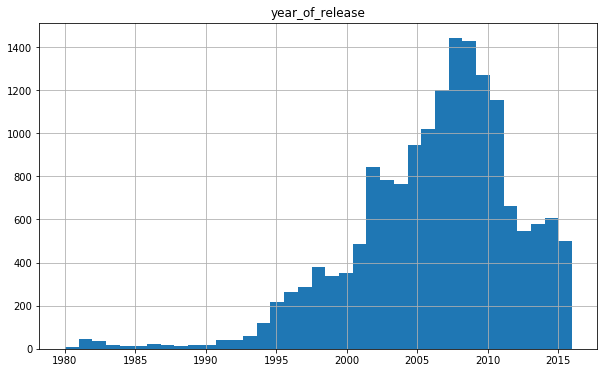

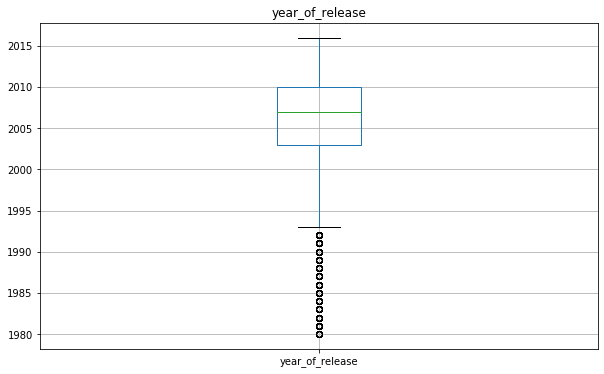

 2008    1441
 2009    1430
 2010    1269
 2007    1202
 2011    1153
 2006    1019
 2005     947
 2002     845
 2003     783
 2004     764
 2012     662
 2015     606
 2014     581
 2013     548
 2016     502
 2001     486
 1998     380
 2000     351
 1999     339
 1997     289
 1996     263
 1995     219
-1        146
 1994     122
 1993      60
 1981      46
 1992      43
 1991      42
 1982      36
 1986      21
 1983      17
 1989      17
 1987      16
 1990      16
 1988      15
 1984      14
 1985      14
 1980       9
Name: year_of_release, dtype: int64

In [22]:
column_description(df[df['year_of_release']!=-1], 'year_of_release', bins_count=37)
df['year_of_release'].value_counts()

Как мы видим из гистограммы, диаграммы рассеивания и статистическиъ показателей: пик количества релизов приходится на 2005 - 2011 годы. Количество релизов до 1992 года можно считать выбросами (выходит за пределы Q1-1.5*IQR диаграммы размаха).   
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и пострим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы


In [23]:
pivot_platform_sales = df.pivot_table(index=['platform'], values=['total_sales'], aggfunc='sum').sort_values('total_sales', ascending=False) 
pivot_platform_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Отберем топ 10 платформ по суммарным продажам и построим для них распределение продаж по годам

In [24]:
top_10_platf_sales = pivot_platform_sales.head(10)
top_10_platf_sales



,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


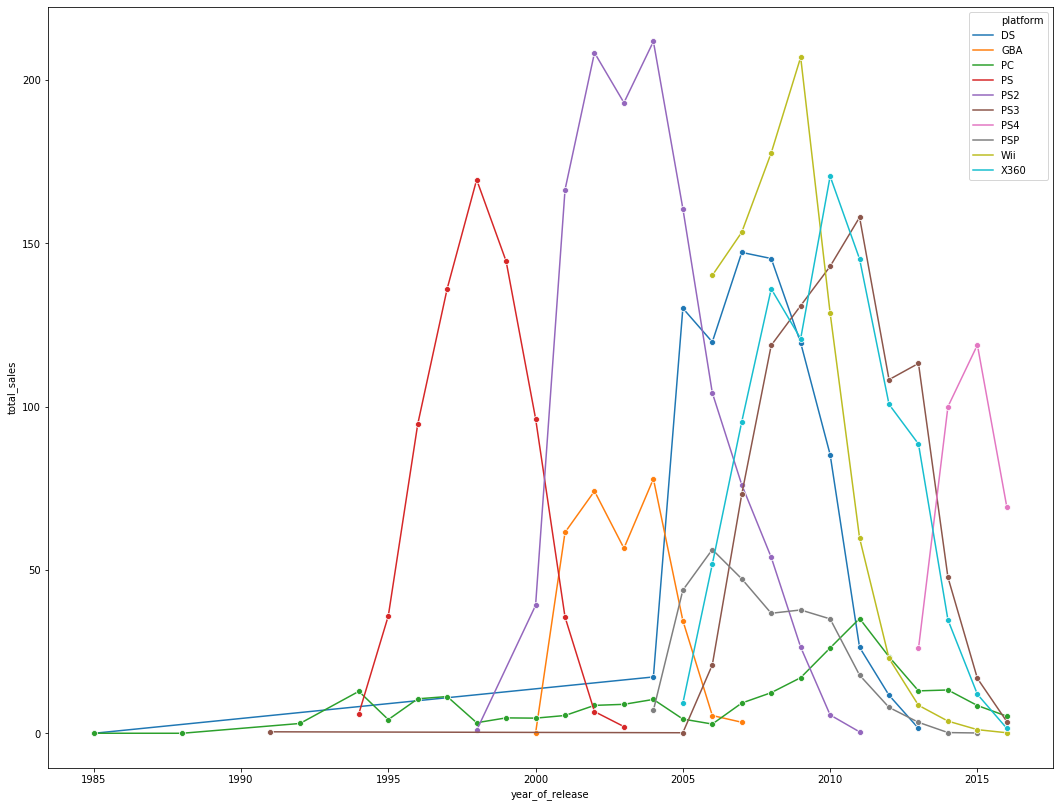

In [25]:
top10_by_sales_pivot = df.query('platform in @top_10_platf_sales.index and year_of_release!=-1').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

plt.figure(figsize=(18,14))
sb.lineplot(data=top10_by_sales_pivot, x='year_of_release', y='total_sales', hue='platform', marker='o')

Из графика видно, что срок жизни игровых платформ (за исключением 'вечной' и не совсем игровой, а скорее универсальной, платформы PC) составляет примерно 5-10 лет.

**Итак, мы определили время жизни игровых платформ, определили топовые платформы по просуммарным продажам, построили график распределения продаж по годам для выбранных игровых платформ.
Основная задача проекта - планирование рекламной компании на 2017 год.
Соответственно для планирования рекламной компании нам нужен срез исходного датасета за актуальный период и по потенциально самым прибыльным платформам.    
Период явно не будет превышать 10 лет, а скорее всего будет меньше, поскольку время жизни платформ ограничено и нас врядли заинтересует вложения в рекламу игр на платформах, которые находятся в конце жизненного цикла.    
Кроме нас точно не будут интересовать платформы. которых не было в 2016 году.**

Построим график продаж по платформам. аналогичный предыдущему, ограничив период 2006 годом и удалим платформы, отсутствующие в 2016 году 


In [26]:
platforms_2016 = list(df[df['year_of_release']==2016]['platform'].unique())
platforms_2016

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

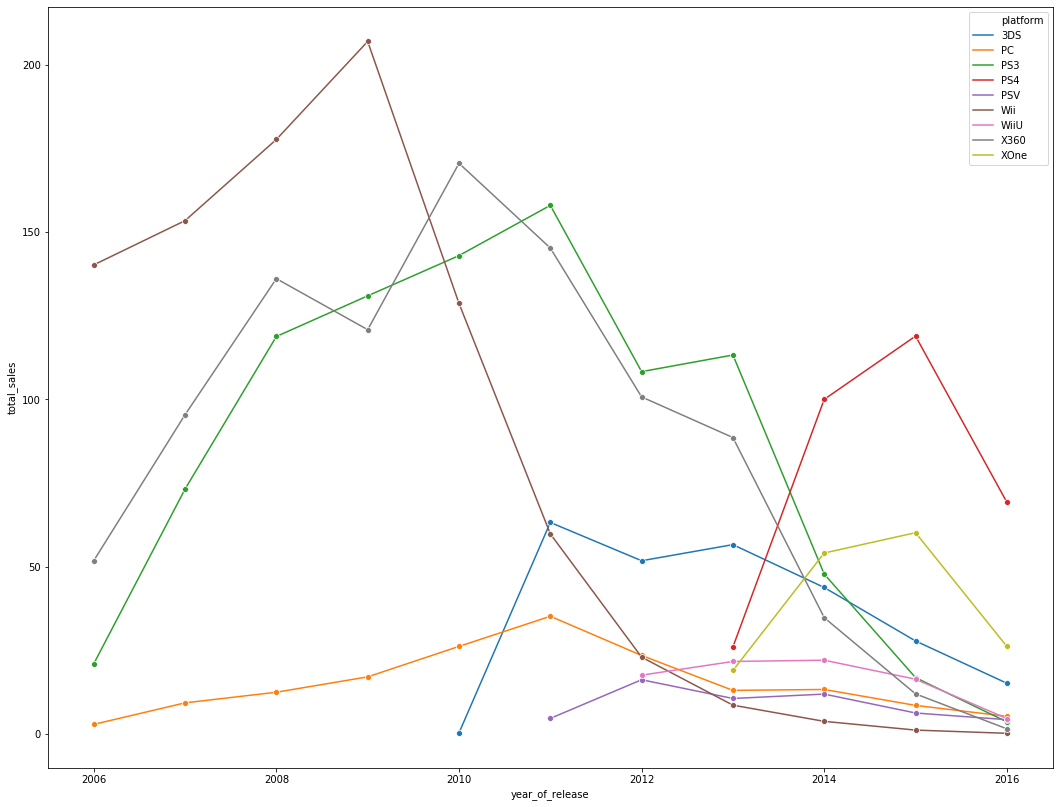

In [27]:
sales_pivot = df.query('platform in @platforms_2016 and year_of_release>=2006').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

plt.figure(figsize=(18,14))
sb.lineplot(data=sales_pivot, x='year_of_release', y='total_sales', hue='platform', marker='o')

Итак, у нас есть список актуальных на **2016** год платформ:
**['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']**
Анализируя продажи 2015-2016 года однозначно добавим в итоговый список потенциально прибыльных платформ: **PS4, XOne и 3DS**
С учетом периода жизни игровой платформы (подтверждаемого крайне низкими продажами в 2015-2016 году) из списка исключаем **PS3, Wii, X360**  
Осталось принять решение по платформам: **PC, WiiU, PSV**
Платформа WiiU самая свежая из оставшегося списка, поэтому ее добавляем.
Платформа PC старше платформы PSV, но поскольку PC неигровая универсальная платформа и PSV имеет более низкие продажи, то выберем платформу PC.

**Получаем итоговый список актуальных, потенциально прибыльных платформ, на которых сосредоточим дальнейгие исследования:**

In [28]:
platforms_act = ['PS4', 'XOne', '3DS', 'WiiU', 'PC']

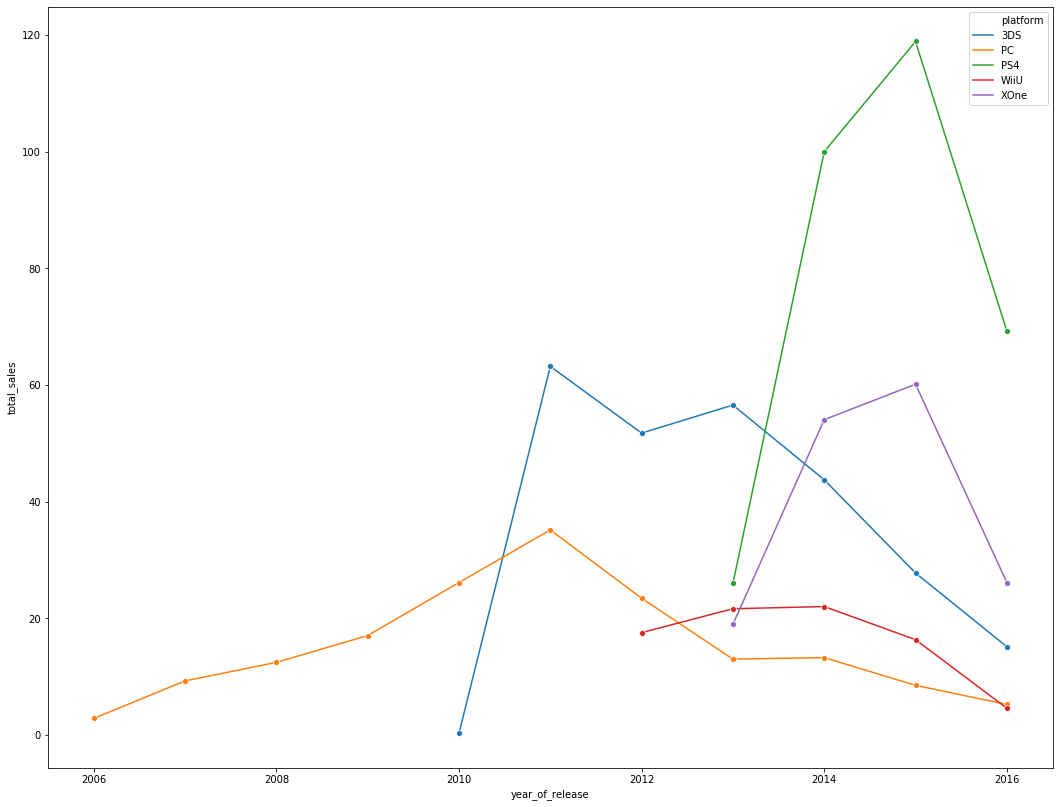

In [29]:
plt.figure(figsize=(18,14))
sales_pivot = df.query('platform in @platforms_act and year_of_release>=2006').pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
sb.lineplot(data=sales_pivot, x='year_of_release', y='total_sales', hue='platform', marker='o')

**Из графика явно виден актуальный период для дальнейшего анализа. данные до 2010 года нам явно не нужны, т.к. 4 из 5 платформ появились в 2010 и позднее.**
**Сформируем срез основного датасета с актуальными для дальнейшего анализа данными**

In [30]:
df = df.query('year_of_release>=2010')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5321 entries, 14 to 16714
Data columns (total 12 columns):
name               5321 non-null object
platform           5321 non-null object
year_of_release    5321 non-null int64
genre              5321 non-null object
na_sales           5321 non-null float64
eu_sales           5321 non-null float64
jp_sales           5321 non-null float64
other_sales        5321 non-null float64
critic_score       2340 non-null float64
user_score         2524 non-null float64
rating             5321 non-null object
total_sales        5321 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 540.4+ KB


**Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.**

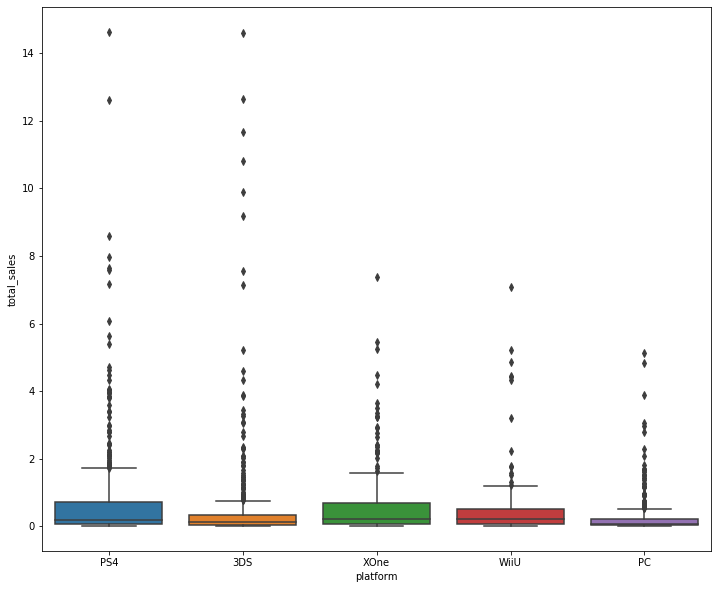

In [31]:
plt.figure(figsize=(12,10))
sb.boxplot(data=df.query('platform in @platforms_act'), y="total_sales", x='platform')

Выбросу на диаграмме размаха по каждой из платформ показывают, что наряду с обычными играми есть игры с огромными продажами (более 14 млн копий для платформ PS4 и 3DS). В этом случае можно ограничить диапазон по оси y, а можно применить логарифмическую шкалу по оси y.
Дополнительно выведем сводную таблицу со статистическими показателями

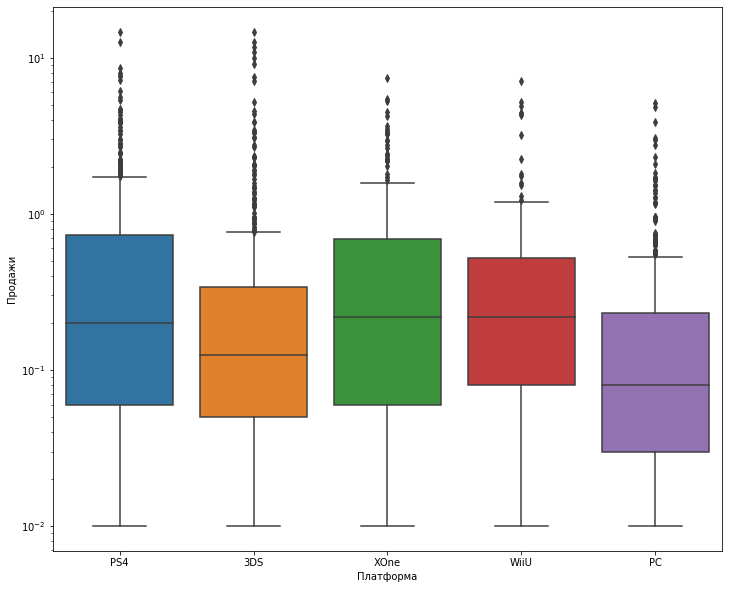

,min,max,mean,median,count,sum,std,var
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,,,,
3DS,0.01,14.60,0.502938,0.125,514,258.51,1.438494,2.069265
PC,0.01,5.14,0.255779,0.080,488,124.82,0.529919,0.280814
PS4,0.01,14.63,0.801378,0.200,392,314.14,1.609456,2.590350
WiiU,0.01,7.09,0.559116,0.220,147,82.19,1.058836,1.121133
XOne,0.01,7.39,0.645020,0.220,247,159.32,1.036139,1.073584


In [32]:
plt.figure(figsize=(12,10))
ax = sb.boxplot(data=df.query('platform in @platforms_act'), y="total_sales", x='platform')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
ax.set_yscale('log')
plt.show()

pvt_stats = df.query('platform in @platforms_act').pivot_table(index=['platform'], values=['total_sales'], aggfunc=['min','max','mean', 'median', 'count', 'sum','std', 'var'])
pvt_stats

В результате видим, что медианные значения по продажам у платформ PS4, WIIU и XOne значения примерно одинаковые 200 - 220 тысяч копий. По платформе 3DS медианное значение продаж значительно ниже, аутсайдер по данному показателю платформа PC.  
На каждой платформе есть игры - хиты, продающиеся по нескольку миллионов экземпляров, вследствие чего среднее у нас сильно смещено вправо относительно медианы по каждой из платформ.
Наибольшее разнообразие игр продается на платформе PC, однако по суммарным продажам данную платформа значительно опережают платформы 3DS и PS4, у которых засчет хитов суммарные продажи выше.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
Соотнесем выводы с продажами игр на других платформах.**
Определим вспомогательную функцию:

In [33]:
def pair_plot_and_heatmap(df, platform):
    temp_df = df[df['platform']==platform].loc[:,['total_sales', 'critic_score', 'user_score']]
    plt.figure(figsize=(10,8))
    plt.title('Анализ влияния оценок пользователей и критиков на продажи по платформе '+platform)
    sb.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)
    plt.figure(figsize=(5,4))
    sb.pairplot(temp_df)

Посмотрим корреляцию по каждой из платформ

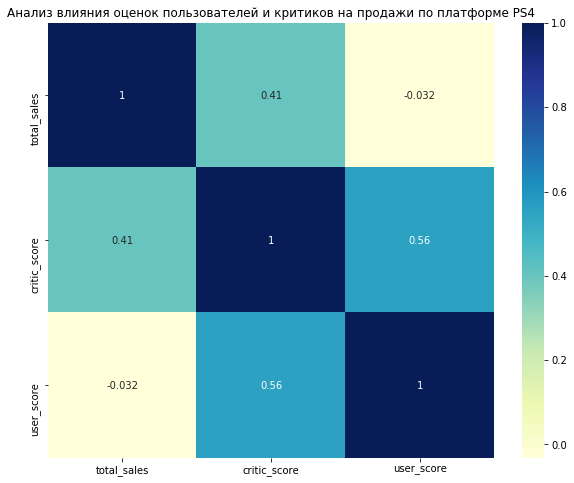

<Figure size 360x288 with 0 Axes>

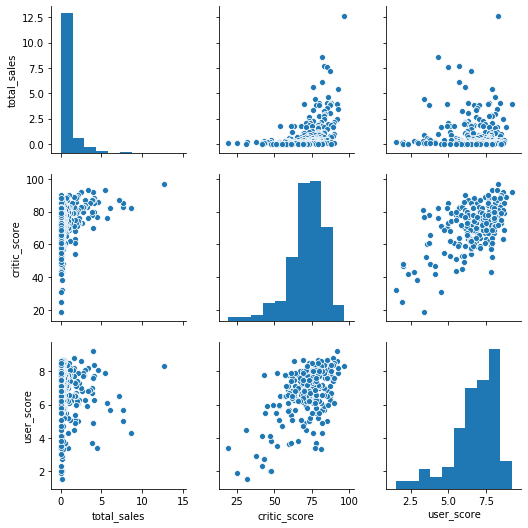

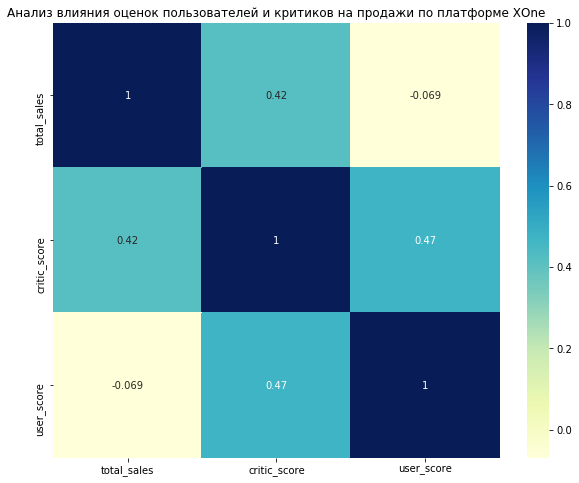

<Figure size 360x288 with 0 Axes>

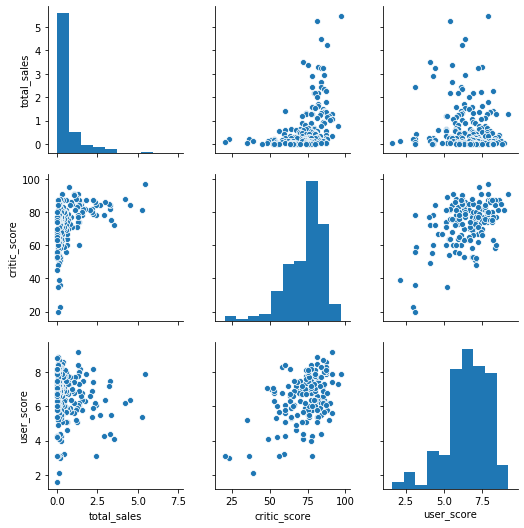

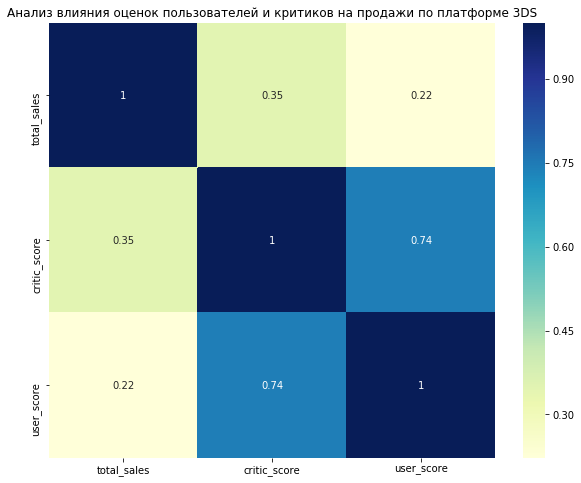

<Figure size 360x288 with 0 Axes>

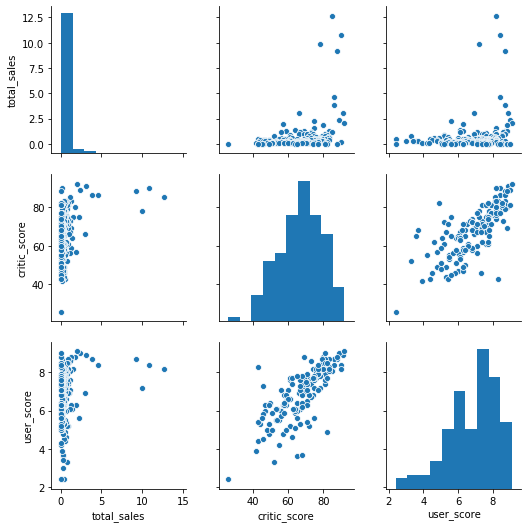

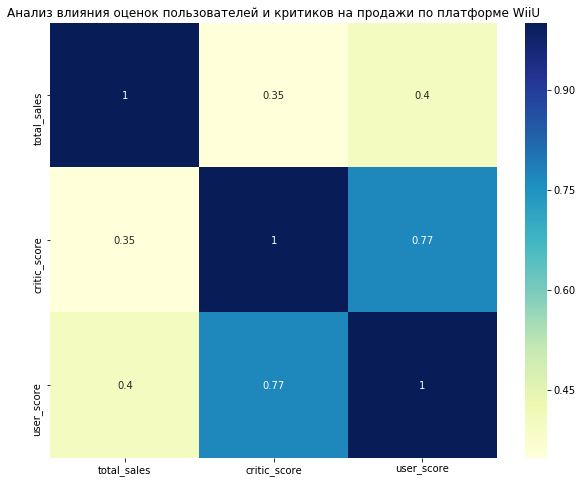

<Figure size 360x288 with 0 Axes>

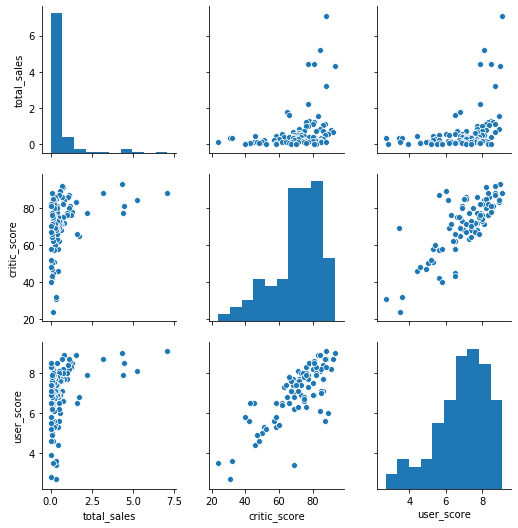

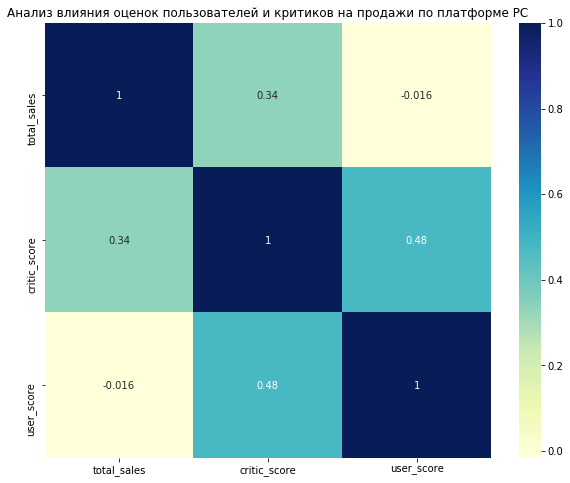

<Figure size 360x288 with 0 Axes>

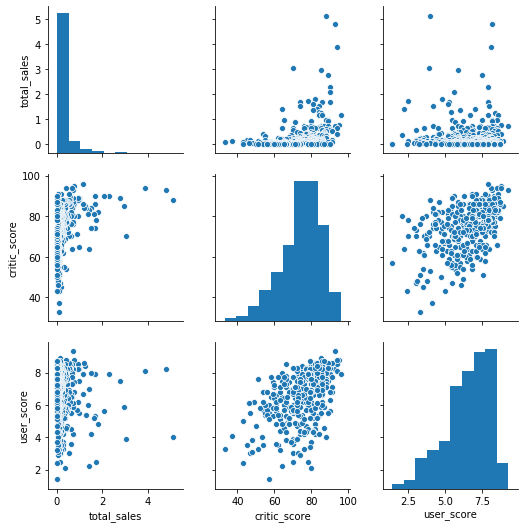

In [34]:
for platform in platforms_act:
    pair_plot_and_heatmap(df, platform)

**Наблюдаем интересную ситуацию:**    
- На платформах PS4, XOne, PC оценки пользователя совсем не коррелируют с продажами игры. При этом оценки критиков имеют имеют несильную положительную корреляцию с продажами (0,3-0,4 коэффициент корреляции)    
- На платформах 3DS, WiiU оценка пользователей сильнее коррелирует с продажами игры (коэффициент корреляции 0.22 для 3DS, 0.4 для WiiU) по сравнению с ранее рассмотренными платформами и наблюдается существенная корреляция между оценками критиков и пользователей (коэффициент корреляции более 0,7). Т.е. на данных оценки пользователей линейно связаны с оценками критиков и нет такого разброса в оценках, как по играм на других платформах.

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

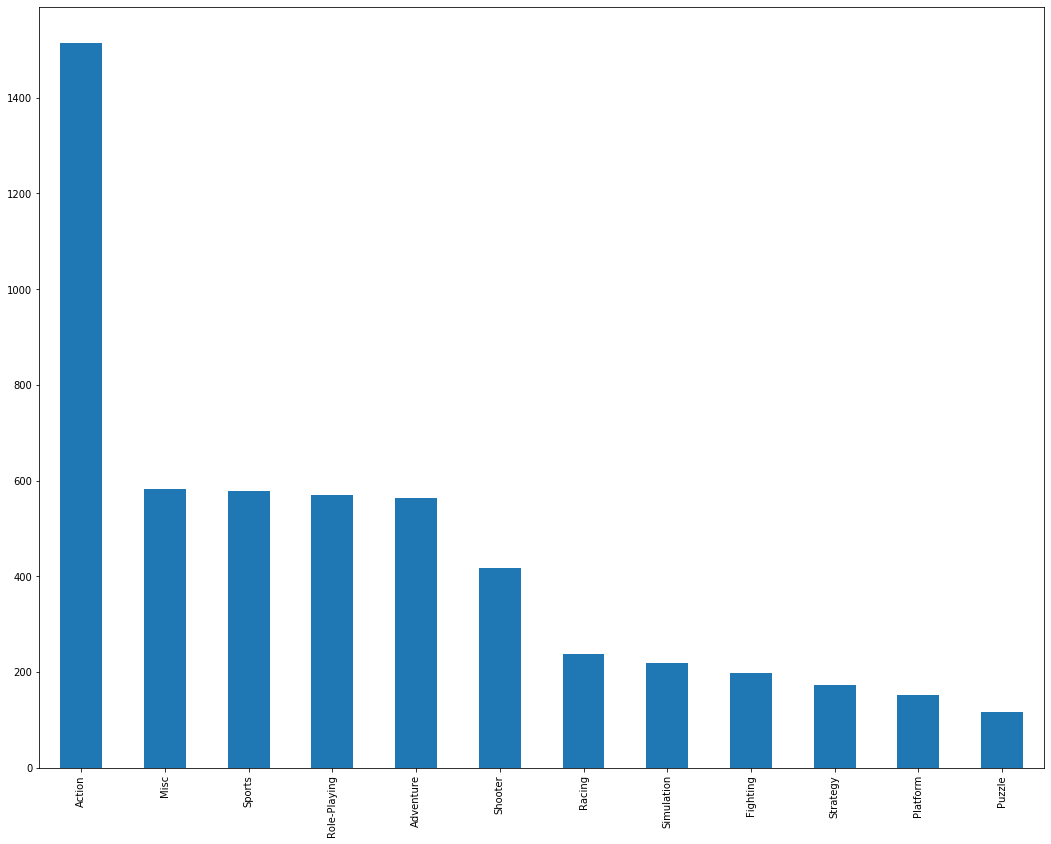

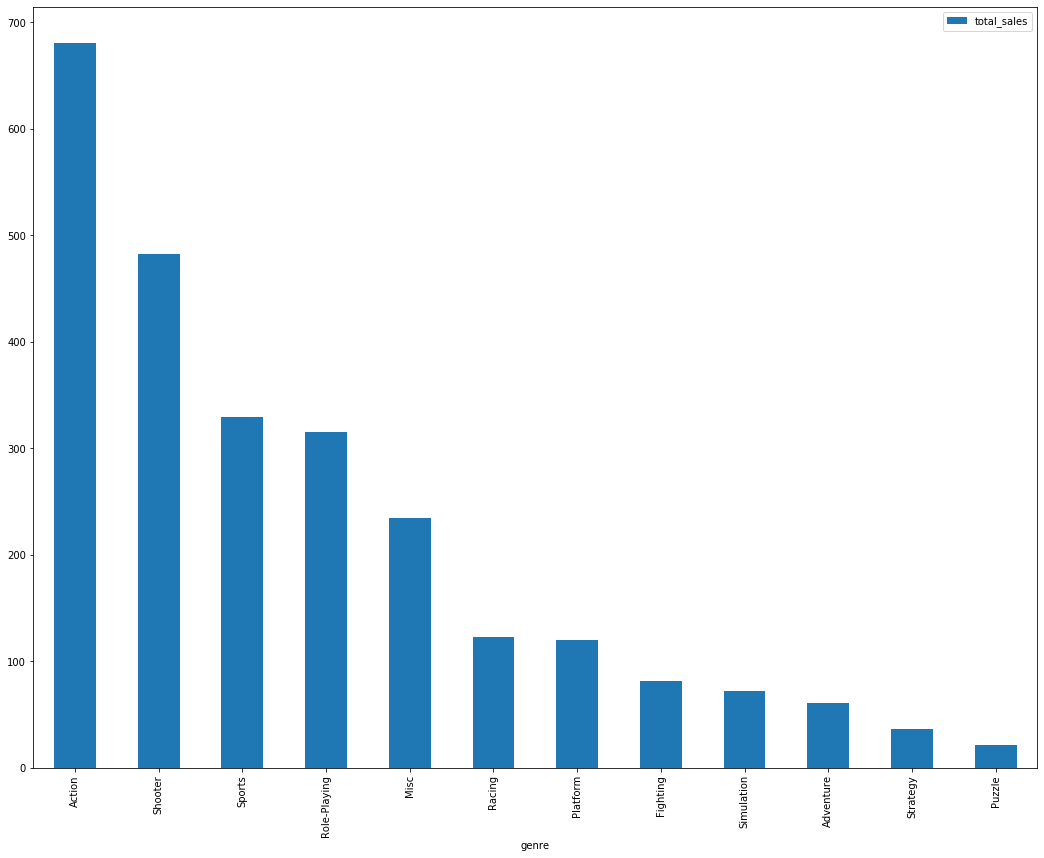

In [35]:
df['genre'].value_counts().plot(kind='bar',figsize=(18,14))
df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar',figsize=(18,14))

Можно выделить три лидирующих по количеству и продажам жанра: Action, Shooter и Role-Playing. Однако очевидно, что если по количеству игр жанр Action более чем в два раза опережает другие жанры, то по продажам разница не такая большая. Это говорит о том, что игры жанров Shooter и Role-Playing в среднем продаются большим количеством экземпляров, чем игры жанры Action.
Построим диаграммы рассеивания суммарных продаж игр и сводную таблицу со статистическими показателями продаж игр по жанрам также, как это делали ранее для платформ.

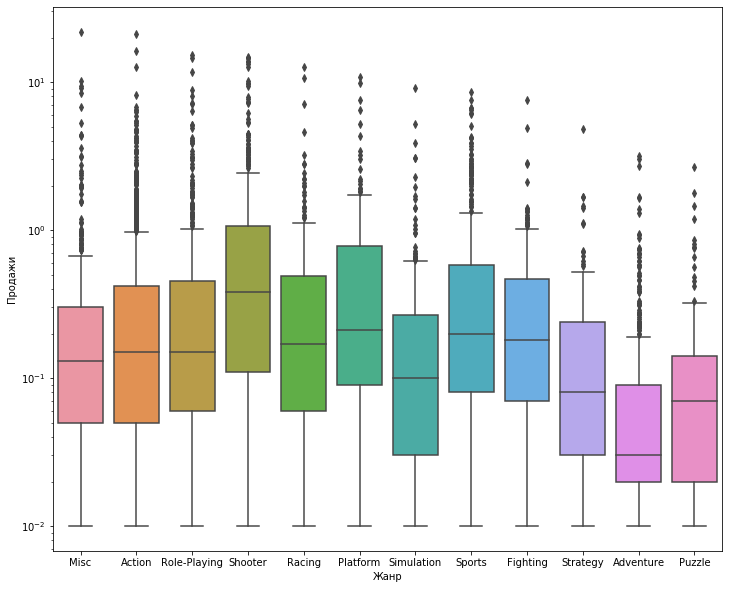

,min,max,mean,median,count,sum,std,var
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,,,,
Action,0.01,21.05,0.449590,0.15,1514,680.68,1.079239,1.164756
Adventure,0.01,3.17,0.108348,0.03,563,61.00,0.276077,0.076218
Fighting,0.01,7.55,0.410000,0.18,199,81.59,0.748987,0.560982
Misc,0.01,21.82,0.403173,0.13,583,235.05,1.312104,1.721618
Platform,0.01,10.81,0.782484,0.21,153,119.72,1.571089,2.468320
Puzzle,0.01,2.67,0.181368,0.07,117,21.22,0.361166,0.130441
Racing,0.01,12.65,0.517637,0.17,237,122.68,1.277156,1.631128
Role-Playing,0.01,15.13,0.554183,0.15,569,315.33,1.384287,1.916250


In [36]:
plt.figure(figsize=(12,10))
ax = sb.boxplot(data=df, y="total_sales", x='genre')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
ax.set_yscale('log')
plt.show()

pvt_stats = df.pivot_table(index=['genre'], values=['total_sales'], aggfunc=['min','max','mean', 'median', 'count', 'sum','std', 'var'])
pvt_stats

Картина подтвердилась, жанр Action - лидер по суммарным продажам только из-за большего количество игр.    
По медианному значению суммарных продаж лидируют жанры Shooter, Sport, Platform и Role-Playing.    
По среднему значению суммарных продаж два явных лидера Shooter и Platform, это говорит о большей доле хитов с аномальным (судя по диаграмме рассеивания) количеством продаж.

Самыми низкими продажами как по средним. так и по медианным показателям характеризуются игры жанров Strategy, Adventure и Puzzle (Мне кажется что на игровых платформах не хватает игр серии Heroes of might and magic, думаю тогда картина в жанре Strategy могла бы поменяться)

### Выводы

- Как мы видим из гистограммы, диаграммы рассеивания и статистическиъ показателей: пик количества релизов приходится на 2005 - 2011 годы. Количество релизов до 1992 года можно считать выбросами (выходит за пределы Q1-1.5*IQR диаграммы размаха).    
- Срок жизни игровых платформ (за исключением 'вечной' и не совсем игровой, а скорее универсальной, платформы PC) составляет примерно 5-10 лет.    
- При проведении анализа суммарных продаж по платформам и годам выделен актуальный период (2010-2016 гг) и платформы 'PS4', 'XOne', '3DS', 'WiiU', 'PC'. Подготовлен срез исходного датасета по данным условиям.    
- Медианные значения по продажам у платформ PS4, WIIU и XOne значения примерно одинаковые 200 - 220 тысяч копий. По платформе 3DS медианное значение продаж значительно ниже, аутсайдер по данному показателю платформа PC.  
- На каждой платформе есть игры - хиты, продающиеся по нескольку миллионов экземпляров, вследствие чего среднее у нас сильно смещено вправо относительно медианы по каждой из платформ.    
- Наибольшее разнообразие игр наблюдается на платформе PC, однако по суммарным продажам данную платформа значительно опережают платформы 3DS и PS4, у которых засчет хитов суммарные продажи выше.
- На платформах PS4, XOne, PC оценки пользователя совсем не коррелируют с продажами игры. При этом оценки критиков имеют имеют несильную положительную корреляцию с продажами (0,3-0,4 коэффициент корреляции).    
- На платформах 3DS, WiiU оценка пользователей сильнее коррелирует с продажами игры (коэффициент корреляции 0.22 для 3DS, 0.4 для WiiU) по сравнению с ранее рассмотренными платформами и наблюдается существенная корреляция между оценками критиков и пользователей (коэффициент корреляции более 0,7). Т.е. на данных оценки пользователей линейно связаны с оценками критиков и нет такого разброса в оценках, как по играм на других платформах.    
- жанр Action - лидер по суммарным продажам только из-за большего количество игр. По медианному значению суммарных продаж лидируют жанры Shooter, Sport, Platform и Role-Playing. По среднему значению суммарных продаж два явных лидера Shooter и Platform, это говорит о большей доле хитов с аномальным (судя по диаграмме рассеивания) количеством продаж.    
- Самыми низкими продажами как по средним. так и по медианным показателям характеризуются игры жанров Strategy, Adventure и Puzzle (Мне кажется что на игровых платформах не хватает игр серии Heroes of might and magic, думаю тогда картина в жанре Strategy могла бы поменяться)    

## Составим портрет пользователя каждого региона

In [37]:
# определим вспомогательную функцию для вывода круговых диаграмм
def top_by_region_pie(group, reg_sales, ax):
    pivot_for_pie = df.pivot_table(index=group, values=reg_sales, aggfunc='sum').sort_values(by=reg_sales, ascending=False)
    pivot_for_pie.plot(y=reg_sales, kind='pie',ax=ax, legend=False, autopct='%.0f%%')

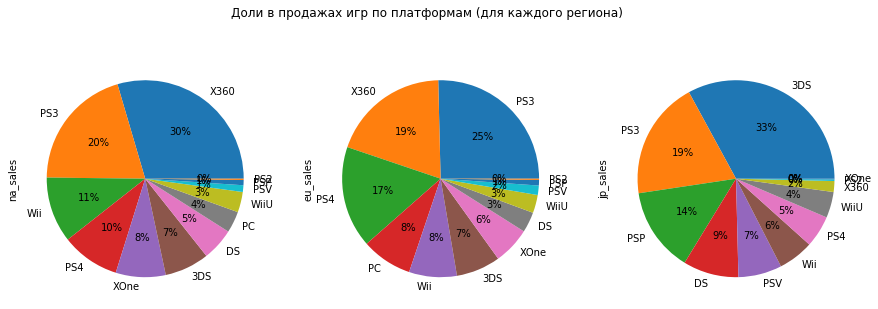

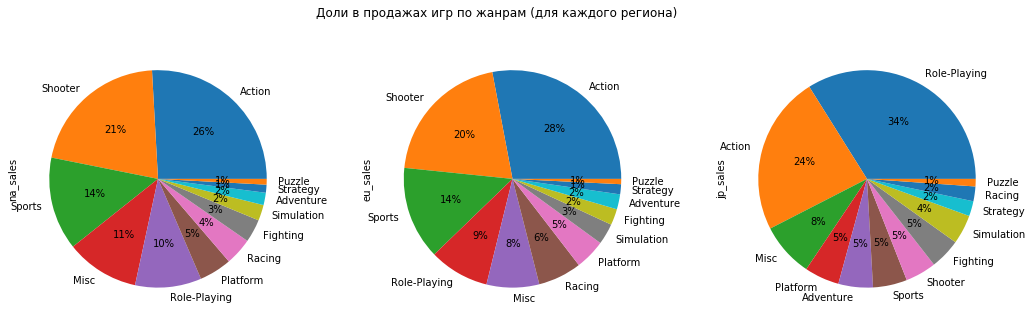

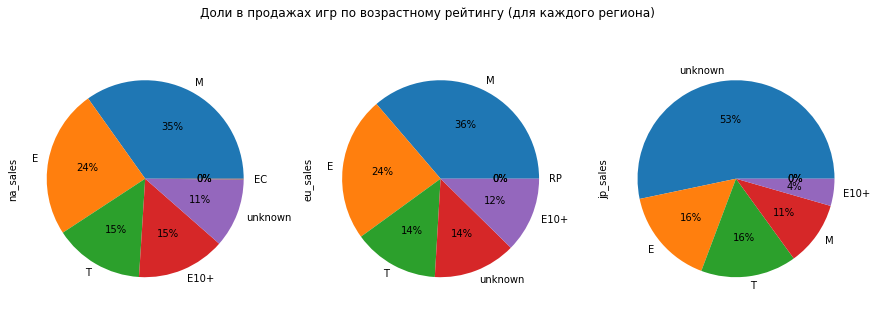

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Доли в продажах игр по платформам (для каждого региона)')
top_by_region_pie('platform', 'na_sales', ax[0])
top_by_region_pie('platform', 'eu_sales', ax[1])
top_by_region_pie('platform', 'jp_sales', ax[2])

fig, ax = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('Доли в продажах игр по жанрам (для каждого региона)')
top_by_region_pie('genre', 'na_sales', ax[0])
top_by_region_pie('genre', 'eu_sales', ax[1])
top_by_region_pie('genre', 'jp_sales', ax[2])

fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Доли в продажах игр по возрастному рейтингу (для каждого региона)')
top_by_region_pie('rating', 'na_sales', ax[0])
top_by_region_pie('rating', 'eu_sales', ax[1])
top_by_region_pie('rating', 'jp_sales', ax[2])

### Выводы

- Как обычно Японцы отличаются от остального мира во всем. В части предпочтений в играх отличия явно видны.    
- В Европе и Америке топ-5 платформ похожи - это разные версии пооления платформ Xbox, PS, Wii. В Европе в топ-5 попали еще персональные компьютеры, в Америке в Топ-5 персональных компьютеров нет. В Японии лидируют платформы DS и PS.    
- В топ-5 жанров игр Америки и Европы также все похоже: Лидируют Action и Shooter, немного отстает Sport. В Японии предпочитают ролевые игры и Action.
- Что касается возрастного рейтинга, то также наблюдаются отличия: В Америке и Европе на первом месте игры для взрослых, далее с приличным отставанием игры для детей младшего возраста (без ограничений) и подростков.   
- В Японии на первом месте игры с неопределенным рейтингом. Поизучав информацию в интернете выяснил, что в Японии присвоением рейтинга занимается не ESRB, а другая организация.    (CERO) — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии, а поскольку данных о рейтинге CERO по играм у нас нет - пропусков в колонке rating для Японии значительно больше.
- После неопределенному рейтинга в Японии расположены игры для детей и подростков. А может быть взрослые играют в детские игры? Предлагаю проверить.

In [39]:
df.pivot_table(index='name', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
name,
Pokemon Black/Pokemon White,5.65
Monster Hunter Freedom 3,4.87
Animal Crossing: New Leaf,4.39
Pokemon X/Pokemon Y,4.35
Monster Hunter 4,3.44


Покемоны и охотники на монстров. У японцев свои представления об интересных играх)

## Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:  
**H0:** Средние пользовательские рейтинги платформ Xbox One и PC равны  
**H1:** Средние пользовательские рейтинги платформ Xbox One и PC не равны  
**Пороговое значене статистической значимости** alpha = 0.05  
Поскольку выборки независимые для расчета p-value используем функцию st.ttest_ind 

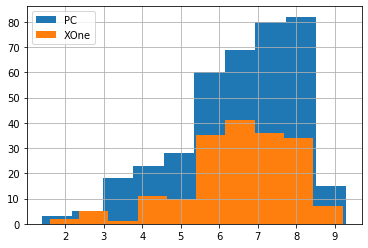

In [40]:
user_score_PC = df[(df['platform'] == 'PC')&(~df['user_score'].isna())]['user_score']
user_score_xbox = df[(df['platform'] == 'XOne')&(~df['user_score'].isna())]['user_score']
ax = user_score_PC.hist(bins=10)
user_score_xbox.hist(bins=10)
ax.legend(['PC','XOne'])

Гистограммы похожи, поэтому нулевая гипотеза может оказаться верной

In [41]:
results = st.ttest_ind(user_score_PC, user_score_xbox, equal_var=False)
print('p-value:', results.pvalue)

p-value: 0.9519979495147267


p-value значительно превышает пороговое значение, поэтому выборки из генеральной совокупности не противоречат гипотезе H0. Соответственно у нас есть основание предполагать, что гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны" верна

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:  
**H0:** Средние пользовательские рейтинги жанров Action и Sports равны  
**H1:** Средние пользовательские рейтинги жанров Action и Sports не равны  
**Пороговое значене статистической значимости** alpha = 0.05  
Поскольку выборки независимые для расчета p-value используем функцию st.ttest_ind   

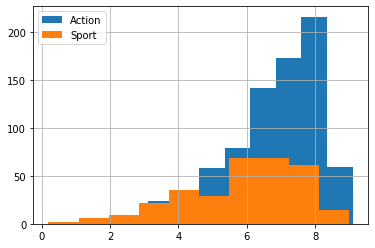

In [44]:
user_score_action = df[(df['genre'] == 'Action')&(~df['user_score'].isna())]['user_score']
user_score_sports = df[(df['genre'] == 'Sports')&(~df['user_score'].isna())]['user_score']
ax = user_score_action.hist(bins=10)
user_score_sports.hist(bins=10)
ax.legend(['Action','Sport'])

Гистограммы отличаются, у игр жанра Sport нет явно выраженного пика в районе 8 баллов, поэтому нулевая гипотеза может быть отвергнута.

In [43]:
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
print('p-value:', results.pvalue)

p-value: 5.704356296291296e-16


p-value около 0, поэтому отвергаем H0, склоняемся к H1: Средние пользовательские рейтинги жанров Action и Sports не равны

### Выводы

- Сформулировали нулевую и альтернативную гипотезы по среднему рейтингу пользователей для платформ XBox и PC:
p-value значительно превышает пороговое значение, поэтому выборки из генеральной совокупности не противоречат гипотезе H0. Соответственно считаем, что Средние пользовательские рейтинги платформ Xbox One и PC равны.    
- Сформулировали нулевую и альтернативную гипотезы по среднему рейтингу пользователей для игр жанров Action и Sports:
p-value около 0, поэтому отвергаем H0, склоняемся к H1: Средние пользовательские рейтинги жанров Action и Sports не равны.    

## Общий вывод по проекту

**При выполнении проекта:**

На этапе подготовки данных:
- На этапе предобработки приведены к нижнему регистру названия столбцов, заполнены (по возможности) пропущенные значения и изменен (при необходимости) тип данных столбцов.  
- Пропуски в данных могут быть вызваны тем, что они были не заполнены в исходной БД, либо произошел сбой при выгрузе данных из базы.  
- Подсчитаны суммарные продажи во всех регисонах и записаны в отдельный столбец.  
- Данные подготовлены для дальнейшего анализа.  

На этапе анализа данных проанализированы продажи и количество игр в зависимости от платформ, года выпуска и т.д., по результатам анализа можно сделать следуюшщие выводы:
- Как мы видим из гистограммы, диаграммы рассеивания и статистическиъ показателей: пик количества релизов приходится на 2005 - 2011 годы. Количество релизов до 1992 года можно считать выбросами (выходит за пределы Q1-1.5*IQR диаграммы размаха).    
- Срок жизни игровых платформ (за исключением 'вечной' и не совсем игровой, а скорее универсальной, платформы PC) составляет примерно 5-10 лет.    
- При проведении анализа суммарных продаж по платформам и годам выделен актуальный период (2010-2016 гг) и платформы 'PS4', 'XOne', '3DS', 'WiiU', 'PC'. Подготовлен срез исходного датасета по данным условиям.    
- Медианные значения по продажам у платформ PS4, WIIU и XOne значения примерно одинаковые 200 - 220 тысяч копий. По платформе 3DS медианное значение продаж значительно ниже, аутсайдер по данному показателю платформа PC.  
- На каждой платформе есть игры - хиты, продающиеся по нескольку миллионов экземпляров, вследствие чего среднее у нас сильно смещено вправо относительно медианы по каждой из платформ.    
- Наибольшее разнообразие игр наблюдается на платформе PC, однако по суммарным продажам данную платформа значительно опережают платформы 3DS и PS4, у которых засчет хитов суммарные продажи выше.
- На платформах PS4, XOne, PC оценки пользователя совсем не коррелируют с продажами игры. При этом оценки критиков имеют имеют несильную положительную корреляцию с продажами (0,3-0,4 коэффициент корреляции).    
- На платформах 3DS, WiiU оценка пользователей сильнее коррелирует с продажами игры (коэффициент корреляции 0.22 для 3DS, 0.4 для WiiU) по сравнению с ранее рассмотренными платформами и наблюдается существенная корреляция между оценками критиков и пользователей (коэффициент корреляции более 0,7). Т.е. на данных оценки пользователей линейно связаны с оценками критиков и нет такого разброса в оценках, как по играм на других платформах.    
- жанр Action - лидер по суммарным продажам только из-за большего количество игр. По медианному значению суммарных продаж лидируют жанры Shooter, Sport, Platform и Role-Playing. По среднему значению суммарных продаж два явных лидера Shooter и Platform, это говорит о большей доле хитов с аномальным (судя по диаграмме рассеивания) количеством продаж.    
- Самыми низкими продажами как по средним. так и по медианным показателям характеризуются игры жанров Strategy, Adventure и Puzzle (Мне кажется что на игровых платформах не хватает игр серии Heroes of might and magic, думаю тогда картина в жанре Strategy могла бы поменяться)    

Составлен портрет пользователя в зависимости от региона:    
- Как обычно Японцы отличаются от остального мира во всем. В части предпочтений в играх отличия явно видны.    
- В Европе и Америке топ-5 платформ похожи - это разные версии пооления платформ Xbox, PS, Wii. В Европе в топ-5 попали еще персональные компьютеры, в Америке в Топ-5 персональных компьютеров нет. В Японии лидируют платформы DS и PS.    
- В топ-5 жанров игр Америки и Европы также все похоже: Лидируют Action и Shooter, немного отстает Sport. В Японии предпочитают ролевые игры и Action.
- Что касается возрастного рейтинга, то также наблюдаются отличия: В Америке и Европе на первом месте игры для взрослых, далее с приличным отставанием игры для детей младшего возраста (без ограничений) и подростков. В Японии же на первом месте неопределенный рейтинг (связано с тем, что в Японии рейтинг присваивает другая организация (CERO)), далее расположены игры для детей и подростков. 

Проверены гипотезы относительно среднего рейтинга пользователей, получен следующий результат:  
- Сформулировали нулевую и альтернативную гипотезы по среднему рейтингу пользователей для платформ XBox и PC:
p-value значительно превышает пороговое значение, поэтому выборки из генеральной совокупности не противоречат гипотезе H0. Соответственно считаем, что Средние пользовательские рейтинги платформ Xbox One и PC равны.    
- Сформулировали нулевую и альтернативную гипотезы по среднему рейтингу пользователей для игр жанров Action и Sports:
p-value около 0, поэтому отвергаем H0, склоняемся к H1: Средние пользовательские рейтинги жанров Action и Sports не равны.    

В целом, по проекту можно сделать вывод, что при планировании рекламной компании необходимо ориентироваться на регион, игровую платформу, оценки критиков, жанр и рейтинг. От данных параметров существенно зависят средние продажи игр.



